# 2.5 Método das Secantes

O método das secantes consiste em aproximarmos a derivada da função $f'(x_i)$ que ocorre no método de Newton da seguinte forma:

$$ f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{x_i-x_{i-1}}$$


Observe que, neste caso, estamos trocando a inclinação da reta tangente pela inclinação da reta secante à curva, conforme a figura abaixo. Assim, dados os pontos $x_{i−1}$ e $x_i$ , onde a reta secante, passando por $(x_{i−1}, f(x_{i−1}) )$ e $(x_i , f(x_i))$, cortar o eixo das abscissas, temos a aproximação $x_{i+1}$ para a raiz $\overline{x}$, conforme ilustrado 

<img src="imagens/secantes.png" width="500">
<p style="text-align:center"> Figura 2.5.1 - Interpretação geométrica do método das secantes</p>

Assim, o método de Newton, dado por

$$ x_{i+1} = x_i-\frac{f(x_i)}{f'x_i)}$$

é modificado da seguinte forma

$$ x_{i+1} = x_i-\frac{ f(x_i)}{ \,\, \large \frac{f(x_i) - f(x_{i-1})}{x_i-x_{i-1}}\,\,}$$

Que pode ser reescrito como 

$$ x_{i+1} = x_i-\frac{ x_{i-1}f(x_i) - x_i f(x_{i-1})}{ f(x_i) - f(x_{i-1})}$$

**Exemplo 2.5.1:** Vamos encontrar a raiz da equação $ln(x)+x-4=0$ com tolerância $\epsilon = 0.0001$ usando o método das secantes.

Com base no que já foi feito no exemplo 2.4.1 podemos obter as iterações com o código mostrado a seguir.

In [2]:
import math
err = 10.0
x0 = 2.1
x1 = 2.0

f = lambda x: math.log(x)+x-4.0

while err> 0.0001:
    x = (x0*f(x1)-x1*f(x0))/(f(x1)-f(x0))
    err = abs(x-x1)/abs(x)   # calcula o erro relativo
    x0 = x1
    x1 = x
    print ("x=%.5f"%x, ", err=%.5f"%err)


x=2.87832 , err=0.30515
x=2.92390 , err=0.01559
x=2.92627 , err=0.00081
x=2.92627 , err=0.00000


Em [Nogueira (2024)](https://github.com/JonathanWNogueira) é disponibilizada uma implementação do método da secante como uma função cujos parÂmetros de entrada são a função (`f`), a precisão desejada (`e`) e as aproximações iniciais (`x_0`e `x_1`). O código abaixo mostra como utilizar a função `secant`. 

In [2]:
# definindo a funcao secant
def secant(f, e, x0, x1):
    error = 1    
    while error > e:
        x2 = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
        error = abs(x2-x1)/abs(x2)
        x0 = x1
        x1 = x2
    return x2

In [3]:
# chamando a funcao secant
x = secant(f, 0.0001, 1.0, 2.0)
print("Método da Secante: ", round(x, 5))

Método da Secante:  2.92627


**Exercício 2.5.1:** Seja $f(x)=-x^3-\cos x$. Com $x_0=-1$ e $x_1=0$. Obtenha uma solução com precisão de 5 casas decimais utilizando o método da secante.

x=-0.86547 , err=0.00000
Raiz: -0.8654740331019471 encontrada em 8 iterações


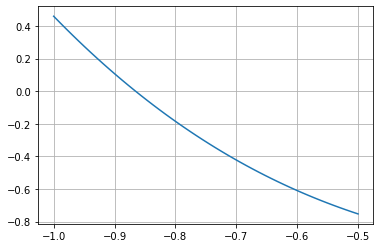

In [33]:
import numpy as np
import matplotlib.pyplot as plt

err = 1
eps = 1e-5
f = lambda x: -x**3 - np.cos(x)
x = np.linspace(-1, -0.5)
plt.plot(x, f(x))
plt.grid()

x0 = -1
x1 = 0
n = 0

while err > eps:
    x = (x0*f(x1)-x1*f(x0))/(f(x1)-f(x0))
    err = abs(x-x1)/abs(x)
    x0 = x1
    x1 = x
    n += 1
    
print ("x=%.5f"%x, ", err=%.5f"%err)
print(f"Raiz: {x} encontrada em {n} iterações")


**Exercício 22.5.2:** Obtenha uma solução para a equação $e^x+2^{-x}+2 \cos x-6=0$ utilizando o método das secantes com $\epsilon = 10^{-5}$ e faça um gráfico do erro relativo em função do número de iterações. 

Raiz: 1.8293836015385934 encontrada em 5 iterações
x=1.82938 , err=0.00000


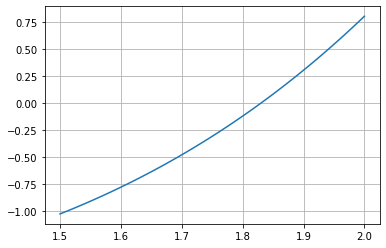

In [31]:
import numpy as np
import matplotlib.pyplot as plt

err = 1
errors = []
eps = 1e-5
f = lambda x: np.exp(x) + 2**(-x) + 2*np.cos(x) - 6
x = np.linspace(1.5, 2)
plt.plot(x, f(x))
plt.grid()

x0 = 1.5
x1 = 2
n = 0

while err > eps:
    x = (x0*f(x1)-x1*f(x0))/(f(x1)-f(x0))
    err = abs(x-x1)/abs(x)
    errors.append(err)
    x0 = x1
    x1 = x
    n += 1

print(f"Raiz: {x} encontrada em {n} iterações")
print ("x=%.5f"%x, ", err=%.5f"%err)

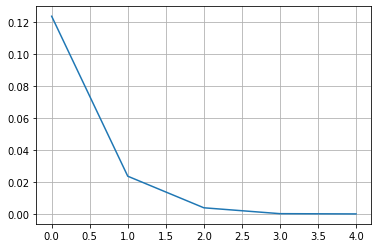

In [24]:
# plot de erro relativo
plt.plot(np.arange(0, len(errors), 1), errors)
plt.grid()

O método da **falsa posição** (também conhecido como *regula falsi*) gera aproximações da mesma maneira que o método da secante, mas inclui um teste para garantir que a raiz esteja sempre no intervalo delimitado por 
iterações sucessivas. 

Primeiramente, escolha as aproximações iniciais $x_0$  e $x_1$ com $f(x_0)\cdot f(x_1)<0$. Então, do mesmo modo que no método da secante, a aproximação $x_2$ é escolhida como a interseção da reta que liga os pontos $(x_0, f(x_0))$ e $(x_1, f(x_1))$ com o eixo $x$. O ponto de intersecção $x_2$ divide o intervalo $(x_0,x_1)$ em dois subintervalos. Para a próxima iteração escolhe-se o intervalo que contém a raiz, verificando se 
$f(x_0)\cdot f(x_2)$ ou $f(x_1)\cdot f(x_2)<0$.

Em [Nogueira (2024)](https://github.com/JonathanWNogueira) é disponibilizada uma implementação do método da falsa posição, `false_pos`como uma função cujos parâmetros de entrada são os mesmos da função `secant`. O código abaixo mostra como utilizar a método da falsa posição para o mesmo problema do exemplo 2.5.1. 

In [4]:
def false_pos(f, e, x0, x1):
    if f(x0) * f(x1) >= 0:
        return 
    error = 1
    while error > e:
        x2 = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
        if x2==0:
            print('raiz')
        if f(x0) * f(x2) < 0:
            x1 = x2
        else:
            x0 = x2
        error = abs(x1 - x0) / abs(x2)
    return x2

In [5]:
f = lambda x: math.log(x)+x-4.0
x = false_pos(f, 0.0001, 2.0, 4.0)
print("Método da Falsa Posição: ", round(x, 5))

Método da Falsa Posição:  2.92627


**Exercício 2.5.3:** Resolva os exercícios 2.5.1 e 2.5.2 usando o método da falsa posição e compare os resultados.


Raiz: -0.8654740331019471 encontrada em 8 iterações


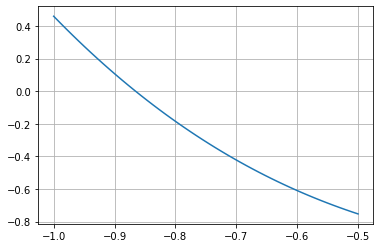

In [30]:
import numpy as np
import matplotlib.pyplot as plt

err = 1
eps = 1e-5
f = lambda x: np.exp(x) + 2**(-x) + 2*np.cos(x) - 6
x = np.linspace(1.5, 2)
plt.plot(x, f(x))
plt.grid()

x0 = -1
x1 = 0
n = 0

while err > eps:
    x = (x0*f(x1)-x1*f(x0))/(f(x1)-f(x0))
    
    if (x == 0):
        print('Raiz encontrada.')
        break
    
    if (x0 * x) < 0:
        x1 = x
    else:
        x0 = x
    err = abs(x-x1)/abs(x)
    errors.append(err)
    x0 = x1
    x1 = x
    n += 1

print(f"Raiz: {x} encontrada em {n} iterações")

**Exercício 2.5.4:** Faça um programa para resolver equações utilizando os métodos da secante e da falsa posição, e plotar um gráfico do erro relativo em função do número de iterações para cada método. Use alguma das equações dos exercícios a seguir para testar.


Raiz: -2.587291490463739 encontrada em 4 iterações


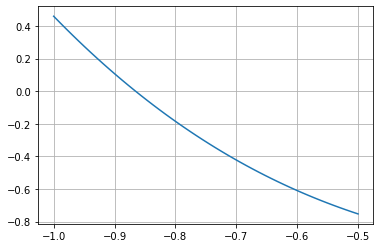

In [32]:
import numpy as np
import matplotlib.pyplot as plt

err = 1
eps = 1e-5
f = lambda x: -x**3 - np.cos(x)
x = np.linspace(-1, -0.5)
plt.plot(x, f(x))
plt.grid()

x0 = 1.5
x1 = 2
n = 0

while err > eps:
    x = (x0*f(x1)-x1*f(x0))/(f(x1)-f(x0))
    
    if (x == 0):
        print('Raiz encontrada.')
        break
    
    if (x0 * x) < 0:
        x1 = x
    else:
        x0 = x
    err = abs(x-x1)/abs(x)
    errors.append(err)
    x0 = x1
    x1 = x
    n += 1

print(f"Raiz: {x} encontrada em {n} iterações")

**Exercícios:**

**1.** Calcule, se possível, as raízes das seguintes funções com pelo menos 6 casas de precisão. Use diferentes métodos e compare a velocidade de convergência.

a) $f(x) = \sqrt{x}-5^{-x}$  

b) $f(x) = e^{x} + x$

c) $f(x) = xln(x)-1$

d) $f(x) = sen(x)-1/2$

e) $x^3-7x^2+14x-6=0$  

f) $2x cos(2x)-(x+1)^2=0$

g) $x-2^{-x}=0$

h) $2+cos(e^x-2)-e^x=0$

i) $f(x) = –0.5x^2 + 2.5x + 4.5$

j) $f(x) = 5x^2 – 5x^2 + 6x -2$

k) $f(x) = –25 + 82x – 90x^2 + 44x^3 – 8x^4 + 0.7x^5$

l) $f(x) = – 12 – 21x + 18x^2 – 2.75x^3$

Raiz: 1.0076239716585016 encontrada em 9 iterações


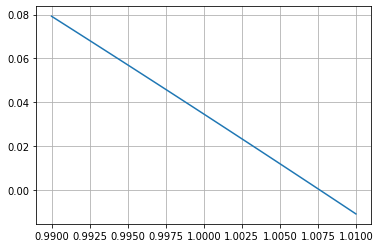

In [43]:
import numpy as np
import matplotlib.pyplot as plt

err = 1
eps = 1e-5
f = lambda x: 2 + np.cos(np.exp(x) - 2) - np.exp(x)
x = np.linspace(0.99, 1.01)
plt.plot(x, f(x))
plt.grid()

x0 = 0
x1 = 1.5
n = 0

while err > eps:
    x = (x0*f(x1)-x1*f(x0))/(f(x1)-f(x0))
    
    if (x == 0):
        print('Raiz encontrada.')
        break
    
    if (x0 * x) < 0:
        x1 = x
    else:
        x0 = x
    err = abs(x-x1)/abs(x)
    errors.append(err)
    x0 = x1
    x1 = x
    n += 1

print(f"Raiz: {x} encontrada em {n} iterações")